In [1]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


Automatically created module for IPython interactive environment


In [2]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples: %d, \t n_features: %d"
     %(n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples: 1797, 	 n_features: 64


In [3]:
def bench_k_means(estimator, name, data):
    to = time() 
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
        % (name, (time() - to), estimator.inertia_,
        metrics.homogeneity_score(labels, estimator.labels_),
        metrics.completeness_score(labels, estimator.labels_),
        metrics.v_measure_score(labels, estimator.labels_),
        metrics.adjusted_rand_score(labels, estimator.labels_),
        metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
        metrics.silhouette_score(data, estimator.labels_, metric=
                            'euclidean', sample_size = sample_size)))

    
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                name="k-means++", data=data) 
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                name="random", data=data)
pca = PCA(n_components=n_digits).fit(data) 
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                name="PCA based", data=data)

k-means++	0.31s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.21s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA based	0.03s	70804	0.671	0.698	0.684	0.561	0.681	0.118


In [4]:
# vizualization
reduced_data = PCA (n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10) 
kmeans.fit(reduced_data)

h = 0.2

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1 
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange (x_min, x_max, h), np.arange (y_min, y_max, h))
                                                          
# Obtain labelsyfor each point in mesh. Use last trained model.                                                         
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
                                                          
z = z.reshape (xx.shape) 
plt.figure(1)



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

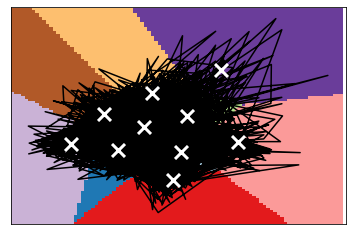

In [5]:
plt.clf() 
plt.imshow(z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max() ), 
           cmap=plt.cm.Paired, 
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k', markersize=2)

# Plot the centroids as a white x 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3, 
            color='w', zorder=10)
                                                                           
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(())
plt.yticks(()) 
plt.show()